This notebook recreates  Fig. 16 in Merdith et al. (2017) 'A full-plate global reconstruction of the Neoproterozoic'. 

It calculates the length of different plate boundaries through time in a plate model.  It does not differentiate between spreading and transform segments of a mid-ocean ridge (i.e. mid-ocean ridge length contains both spreading and transform components, so it shouldn't be used for an indicator of seafloor production rates).

It should be (reasonably) adaptable for all times, provided you have a plate model with plate boundaries.

In [2]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [3]:
#setbasedir for loading reconstruction files
basedir = '/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2017_GR/Sample_data/'

#Merdith (Mer17) model
Mer17_rotation_model = pygplates.RotationModel('%sMer17_1000-520Ma_rotations.rot' % basedir)
Mer17_polygons = pygplates.FeatureCollection('%sMer17_1000-520Ma_shapes.gpml' % basedir)
Mer17_topology_features = ['%sMer17_1000-520Ma_Convergence.gpml' % basedir,
                           '%sMer17_1000-520Ma_Divergence.gpml' % basedir,
                           '%sMer17_1000-520Ma_Topologies.gpml' % basedir,
                           '%sMer17_1000-520Ma_Transform.gpml' % basedir]

#Matthews (Mat16) model now, note that topologies and plate boundaries are all rolled into single files for this model
#and that you need the topologybuildingblocks file as well
Mat16_rotation_model = pygplates.RotationModel('%sMat16_410-0Ma.rot' % basedir)
Mat16_polygons = pygplates.FeatureCollection('%sMat16_PresentDay_ContinentalPolygons.gpml' % basedir)
Mat16_topology_features = ['%sMat16_Mesozoic-Cenozoic_plate_boundaries.gpml' % basedir,
                           '%sMat16_Paleozoic_plate_boundaries.gpml' % basedir,
                           '%sMat16_TopologyBuildingBlocks.gpml' % basedir]

In [4]:
# for Mer17 model
Mer17_Ridge_length = []
Mer17_Trench_length = []
Mer17_Fault_length = []
Mer17_Boundary_total = []
for time in np.arange(520,1001,1):
    #print time
    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(Mer17_topology_features,
                                 Mer17_rotation_model,
                                 resolved_topologies,
                                 time,
                                 shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Mer17_Ridge_length.append(total_ridge_length_in_kms)
    Mer17_Trench_length.append(total_subduction_zone_length_in_kms)
    Mer17_Fault_length.append(total_fault_length_in_kms)
    Mer17_Boundary_total.append(total_boundary_length_in_kms)

In [5]:
# for Mat16 model
Mat16_Ridge_length = []
Mat16_Trench_length = []
Mat16_Fault_length = []
Mat16_Boundary_total = []
for time in np.arange(0,411,1):
    #print time
    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(Mat16_topology_features,
                                 Mat16_rotation_model,
                                 resolved_topologies,
                                 time,
                                 shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0
    total_fault_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:
        
        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_transform):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            total_subduction_zone_length += shared_sub_segments_length
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_transform:
            total_fault_length += shared_sub_segments_length
        
    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms
    total_fault_length_in_kms = total_fault_length * pygplates.Earth.mean_radius_in_kms
    total_boundary_length_in_kms = (total_fault_length_in_kms+total_ridge_length_in_kms+total_subduction_zone_length_in_kms)
    Mat16_Ridge_length.append(total_ridge_length_in_kms)
    Mat16_Trench_length.append(total_subduction_zone_length_in_kms)
    Mat16_Fault_length.append(total_fault_length_in_kms)
    Mat16_Boundary_total.append(total_boundary_length_in_kms)

In [6]:
#turn into arrays
#we also add faults and ridges together.  this is partly because we don't differentiate between spreading and transform
#segments at MoR.  So by having them together it becomes less ambiguous

Mer17_array_Ridge_length = np.asarray(Mer17_Ridge_length)
Mer17_array_Trench_length = np.asarray(Mer17_Trench_length)
Mer17_array_Fault_length = np.asarray(Mer17_Fault_length)
Mer17_Ridge_Fault = Mer17_array_Ridge_length+Mer17_array_Fault_length
Mer17_array_Boundary_total = np.asarray(Mer17_Boundary_total)

Mat16_array_Ridge_length = np.asarray(Mat16_Ridge_length)
Mat16_array_Trench_length = np.asarray(Mat16_Trench_length)
Mat16_array_Fault_length = np.asarray(Mat16_Fault_length)
Mat16_Ridge_Fault = Mat16_array_Ridge_length+Mat16_array_Fault_length
Mat16_array_Boundary_total = np.asarray(Mat16_Boundary_total)

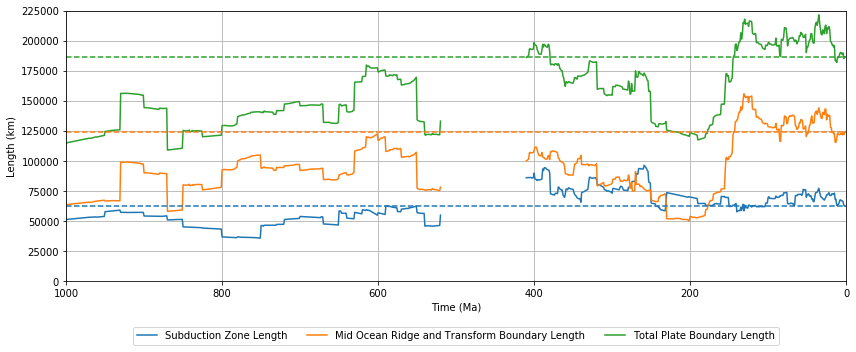

In [7]:
Mer17_time = np.arange(520, 1001, 1)
Mat16_time = np.arange(0, 411, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
#because the time series data isn't fully continuous we plot each individually and then use
#hexidecimal codes to make sure the same boundaries are plotted with the same colour
ax.plot(Mer17_time, Mer17_array_Trench_length, color='#1f77b4', label='Subduction Zone Length')
ax.plot(Mer17_time, Mer17_Ridge_Fault, color='#ff7f0e', label='Mid Ocean Ridge and Transform Boundary Length')
ax.plot(Mer17_time, Mer17_array_Boundary_total, color='#2ca02c', label='Total Plate Boundary Length')
ax.plot(Mat16_time, Mat16_array_Trench_length, color='#1f77b4')
ax.plot(Mat16_time, Mat16_Ridge_Fault, color='#ff7f0e')
ax.plot(Mat16_time, Mat16_array_Boundary_total, color='#2ca02c')

#plot present day values as horizontal lines back in time for a reference
ax.axhline(Mat16_array_Trench_length[0], color='#1f77b4', ls='--')
ax.axhline(Mat16_Ridge_Fault[0], color='#ff7f0e', ls='--')
ax.axhline(Mat16_array_Boundary_total[0], color='#2ca02c', ls='--')

ax.set_xlim(1000,0)
ax.set_ylim(0,225000)
ax.set_xlabel('Time (Ma)')
ax.set_ylabel('Length (km)')
ax.grid(True)
ax.legend(bbox_to_anchor=(0.5,-0.15), loc='upper center', ncol=3)
plt.tight_layout()